<a href="https://colab.research.google.com/github/OmkarBhosale06/LC50_ML/blob/main/LC50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
dataset = '/content/qsar_fish_toxicity.csv'
data = pd.read_csv(dataset)

In [3]:
data.head()

,CIC0,SM1_Dz(Z),GATS1i,NdsCH,NdssC,MLOGP,LC50 [-LOG(mol/L)]
0,3.260,0.829,1.676,0,1,1.453,3.770
1,2.189,0.580,0.863,0,0,1.348,3.115
2,2.125,0.638,0.831,0,0,1.348,3.531
3,3.027,0.331,1.472,1,0,1.807,3.510
4,2.094,0.827,0.860,0,0,1.886,5.390


In [4]:
column_names = list(data.columns)
column_names


['CIC0',
 'SM1_Dz(Z)',
 'GATS1i',
 'NdsCH',
 'NdssC',
 'MLOGP',
 'LC50 [-LOG(mol/L)]']

In [5]:
data.shape

(908, 7)

In [6]:
data.isnull().sum()


CIC0                  0
SM1_Dz(Z)             0
GATS1i                0
NdsCH                 0
NdssC                 0
MLOGP                 0
LC50 [-LOG(mol/L)]    0
dtype: int64

In [7]:
data.describe()

,CIC0,SM1_Dz(Z),GATS1i,NdsCH,NdssC,MLOGP,LC50 [-LOG(mol/L)]
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,2.898129,0.628468,1.293591,0.229075,0.485683,2.109285,4.064431
std,0.756088,0.428459,0.394303,0.605335,0.861279,1.433181,1.455698
min,0.667000,0.000000,0.396000,0.000000,0.000000,-2.884000,0.053000
25%,2.347000,0.223000,0.950750,0.000000,0.000000,1.209000,3.151750
50%,2.934000,0.570000,1.240500,0.000000,0.000000,2.127000,3.987500
75%,3.407000,0.892750,1.562250,0.000000,1.000000,3.105000,4.907500
max,5.926000,2.171000,2.920000,4.000000,6.000000,6.515000,9.612000


In [8]:

data.std()

CIC0                  0.756088
SM1_Dz(Z)             0.428459
GATS1i                0.394303
NdsCH                 0.605335
NdssC                 0.861279
MLOGP                 1.433181
LC50 [-LOG(mol/L)]    1.455698
dtype: float64

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = scaler.fit_transform(data)

In [10]:
df = pd.DataFrame(data)

In [11]:
df.columns = column_names

In [12]:
df.head()

,CIC0,SM1_Dz(Z),GATS1i,NdsCH,NdssC,MLOGP,LC50 [-LOG(mol/L)]
0,0.478873,0.468288,0.970369,-0.378635,0.597484,-0.458175,-0.202372
1,-0.938408,-0.113184,-1.092634,-0.378635,-0.564220,-0.531479,-0.652576
2,-1.023101,0.022259,-1.173835,-0.378635,-0.564220,-0.531479,-0.366645
3,0.170538,-0.694657,0.452715,1.274253,-0.564220,-0.211035,-0.381079
4,-1.064124,0.463618,-1.100247,-0.378635,-0.564220,-0.155883,0.911109


In [13]:
X = df.drop(['LC50 [-LOG(mol/L)]'], axis=1)

In [14]:
X.head()

,CIC0,SM1_Dz(Z),GATS1i,NdsCH,NdssC,MLOGP
0,0.478873,0.468288,0.970369,-0.378635,0.597484,-0.458175
1,-0.938408,-0.113184,-1.092634,-0.378635,-0.564220,-0.531479
2,-1.023101,0.022259,-1.173835,-0.378635,-0.564220,-0.531479
3,0.170538,-0.694657,0.452715,1.274253,-0.564220,-0.211035
4,-1.064124,0.463618,-1.100247,-0.378635,-0.564220,-0.155883


In [15]:
y = df['LC50 [-LOG(mol/L)]']

In [16]:
y.head()

0   -0.202372
1   -0.652576
2   -0.366645
3   -0.381079
4    0.911109
Name: LC50 [-LOG(mol/L)], dtype: float64

In [17]:
model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [18]:
model.fit(X_train, y_train)

LinearRegression()

In [40]:
y_pred = model.predict(X_test)
print(y_pred)

[-1.32473751e+00 -1.14975750e+00 -9.27507653e-02  3.29132847e-02
 -1.66728927e+00 -9.00245559e-01 -1.07510785e+00  6.09878025e-01
 -7.44332276e-01  7.16021158e-02 -2.44916703e-02  2.54426361e-02
 -1.10491119e+00  6.27657310e-01 -9.93982491e-02 -1.00565392e+00
  4.31864656e-01 -2.19210386e-01  2.21981178e+00 -9.94595384e-01
 -9.05610354e-02  1.31130455e-01  9.35738941e-01 -1.06606109e+00
 -2.58458182e-01  5.32382801e-01 -7.29313839e-01 -8.21632785e-01
 -1.85315608e+00 -6.68998139e-02  2.51303927e-01 -3.11003759e-01
 -1.09990576e+00 -8.00732954e-01 -4.05884280e-01  2.88331150e+00
 -2.11161168e-01 -1.75045684e-01 -6.48052110e-01 -6.43334220e-01
  5.00116794e-01  7.76822031e-01  4.81967749e-01  2.78000591e-02
 -2.69699969e-01  7.29226832e-01 -4.18613029e-01  1.40646472e+00
  8.83086999e-01  7.23967794e-01  7.11943597e-01  9.68846653e-02
 -2.73301748e+00  1.04655257e-01 -8.40496395e-01 -1.31821583e-01
  2.54305747e-02 -5.86758142e-01  1.87396747e-01 -4.87508120e-01
  3.42210765e-01 -1.09990

In [41]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.44575321147275504

In [42]:
df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
df.head()

,Real Values,Predicted Values
685,-2.023120,-1.324738
255,-1.895276,-1.149757
868,0.147481,-0.092751
142,-0.616147,0.032913
641,-2.426585,-1.667289


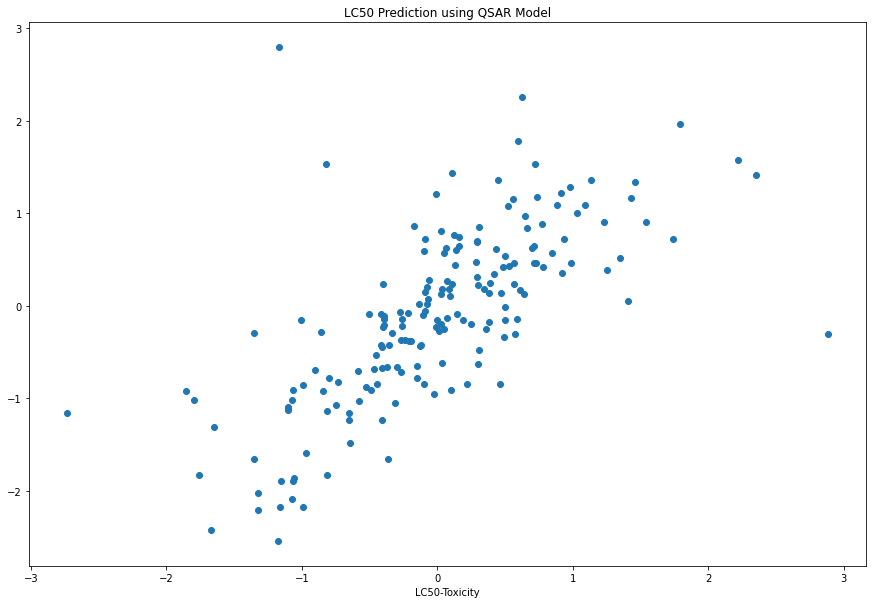

In [49]:
plt.figure(figsize=(15,10))
plt.scatter(y_pred,y_test)
plt.title("LC50 Prediction using QSAR Model")
plt.xlabel("LC50-Toxicity")
plt.show()

In [52]:
y_pred1 = model.predict(X_train)

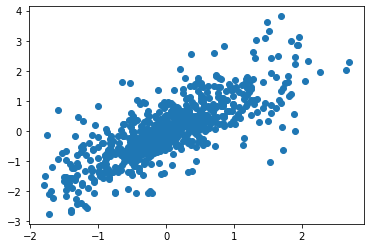

In [53]:
plt.scatter(y_pred1,y_train)
plt.show()